In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

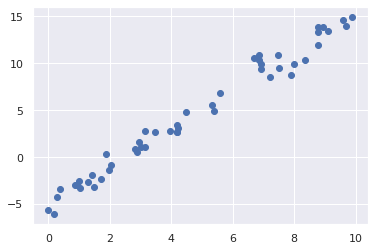

In [2]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x, y);

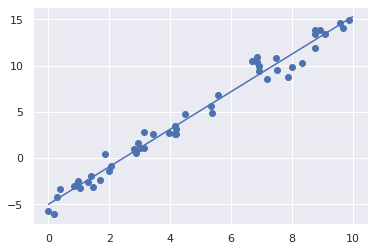

In [4]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

In [5]:
print(model.coef_[0])
print(model.intercept_)

2.027208810360695
-4.998577085553202


In [6]:
rng.rand(50)

array([0.93259546, 0.69681816, 0.06600017, 0.75546305, 0.75387619,
       0.92302454, 0.71152476, 0.12427096, 0.01988013, 0.02621099,
       0.02830649, 0.24621107, 0.86002795, 0.53883106, 0.55282198,
       0.84203089, 0.12417332, 0.27918368, 0.58575927, 0.96959575,
       0.56103022, 0.01864729, 0.80063267, 0.23297427, 0.8071052 ,
       0.38786064, 0.86354185, 0.74712164, 0.55624023, 0.13645523,
       0.05991769, 0.12134346, 0.04455188, 0.10749413, 0.22570934,
       0.71298898, 0.55971698, 0.01255598, 0.07197428, 0.96727633,
       0.56810046, 0.20329323, 0.25232574, 0.74382585, 0.19542948,
       0.58135893, 0.97001999, 0.8468288 , 0.23984776, 0.49376971])

In [7]:
rng.randn(50)

array([ 1.12141771,  0.40890054, -0.02461696, -0.77516162,  1.27375593,
        1.96710175, -1.85798186,  1.23616403,  1.62765075,  0.3380117 ,
       -1.19926803,  0.86334532, -0.1809203 , -0.60392063, -1.23005814,
        0.5505375 ,  0.79280687, -0.62353073,  0.52057634, -1.14434139,
        0.80186103,  0.0465673 , -0.18656977, -0.10174587,  0.86888616,
        0.75041164,  0.52946532,  0.13770121,  0.07782113,  0.61838026,
        0.23249456,  0.68255141, -0.31011677, -2.43483776,  1.0388246 ,
        2.18697965,  0.44136444, -0.10015523, -0.13644474, -0.11905419,
        0.01740941, -1.12201873, -0.51709446, -0.99702683,  0.24879916,
       -0.29664115,  0.49521132, -0.17470316,  0.98633519,  0.2135339 ])

In [9]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(100, 3)
y = 0.5 + np.dot(x, [1.5, -2, 1.])

model.fit(x, y)
print(model.intercept_)
print(model.coef_)

0.5000000000000144
[ 1.5 -2.   1. ]


In [10]:
from sklearn.preprocessing import PolynomialFeatures
x = np.array([2, 3, 4])
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, None])

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

In [11]:
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(7),
                          LinearRegression())

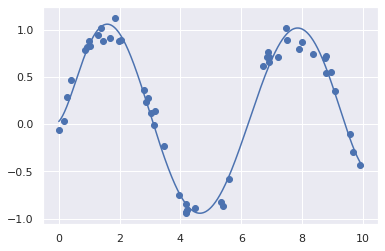

In [12]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + .1 * rng.randn(50)

poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y);
plt.plot(xfit, yfit);

In [13]:
from sklearn.base import BaseEstimator, TransformerMixin

class GaussianFeatures(BaseEstimator, TransformerMixin):
    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor
        
    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x-y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))
    
    def fit(self, x, y=None):
        self.centers_ = np.linspace(x.min(), x.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self
    
    def transform(self, x):
        return self._gauss_basis(x[:, :, np.newaxis], self.centers_,
                                self.width_, axis=1)

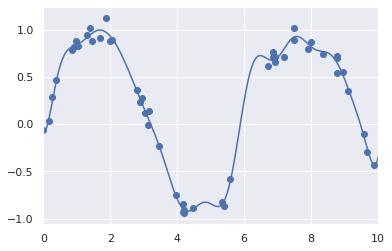

In [14]:
gauss_model = make_pipeline(GaussianFeatures(20),
                           LinearRegression())
gauss_model.fit(x[:, np.newaxis], y)
yfit = gauss_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.xlim(0, 10);